In [1]:
# Import necessary functions from scripts
from scripts.db import retrieve_data_from_database
from scripts.user_analysis import aggregate_experience_metrics, analyze_top_bottom_frequent
from scripts.data_processing import  normalize_engagement_metrics
from scripts.data_clustering import apply_kmeans_clustering, elbow_method
from scripts.data_visualization import plot_clusters_2d, plot_elbow_method, analyze_distributions

In [2]:
# Step 1: Load data from the database
df = retrieve_data_from_database()

In [3]:
# variables declaration for the next steps
columns =   ['TCP DL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg Bearer TP DL (kbps)']

In [4]:
# Step 2: Aggregate experience metrics per customer ID (MSISDN)
experience_metrics = aggregate_experience_metrics(df)

In [5]:
# Step 3: Normalize the engagement metrics
normalized_metrics = normalize_engagement_metrics(experience_metrics, columns=columns)

In [6]:
# Step 4: Apply k-means clustering
experience_metrics_with_cluster, kmeans = apply_kmeans_clustering(normalized_metrics, n_clusters=3, columns=columns)

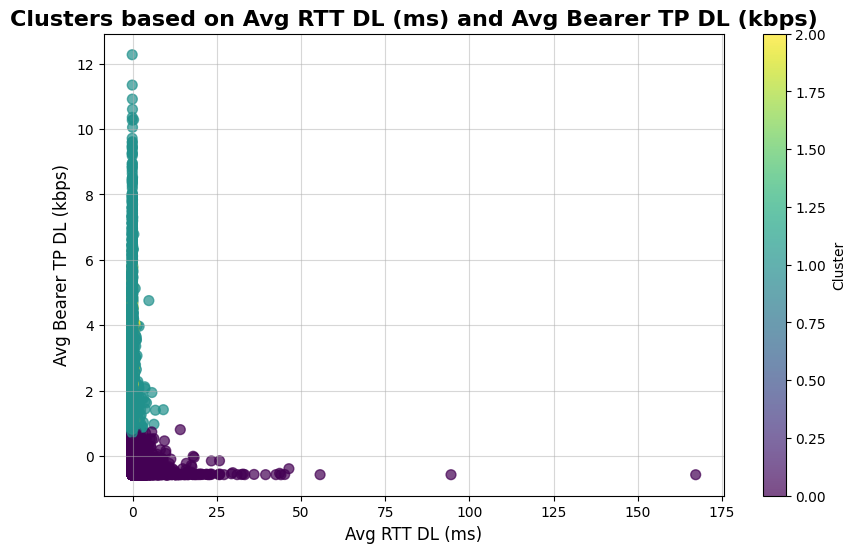

In [7]:
# Step 5: Plot the top 3 most used applications
plot_clusters_2d(experience_metrics_with_cluster, 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'cluster')

In [8]:
# Step 6: Use the elbow method to determine the optimal number of clusters
wcss = elbow_method(normalized_metrics, columns=columns)

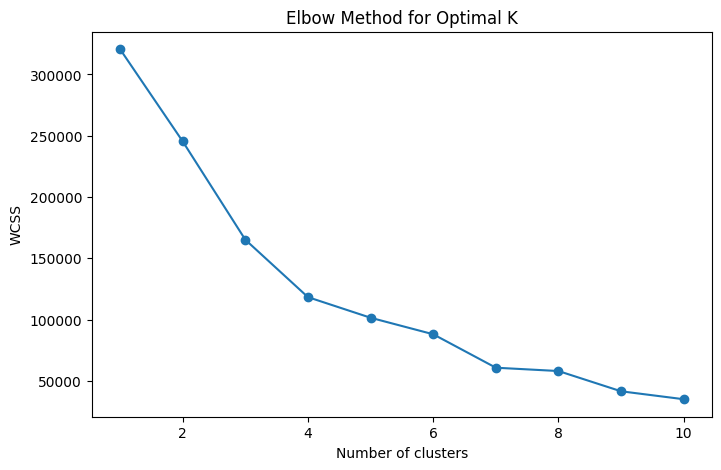

In [9]:
# Plot the elbow method
plot_elbow_method(wcss)

In [10]:
# Step 7: Analyze distributions for Avg Bearer TP DL (kbps) per Handset Type
analyze_distributions(experience_metrics, 'Avg Bearer TP DL (kbps)', 'Handset Type')

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1200x600 with 0 Axes>

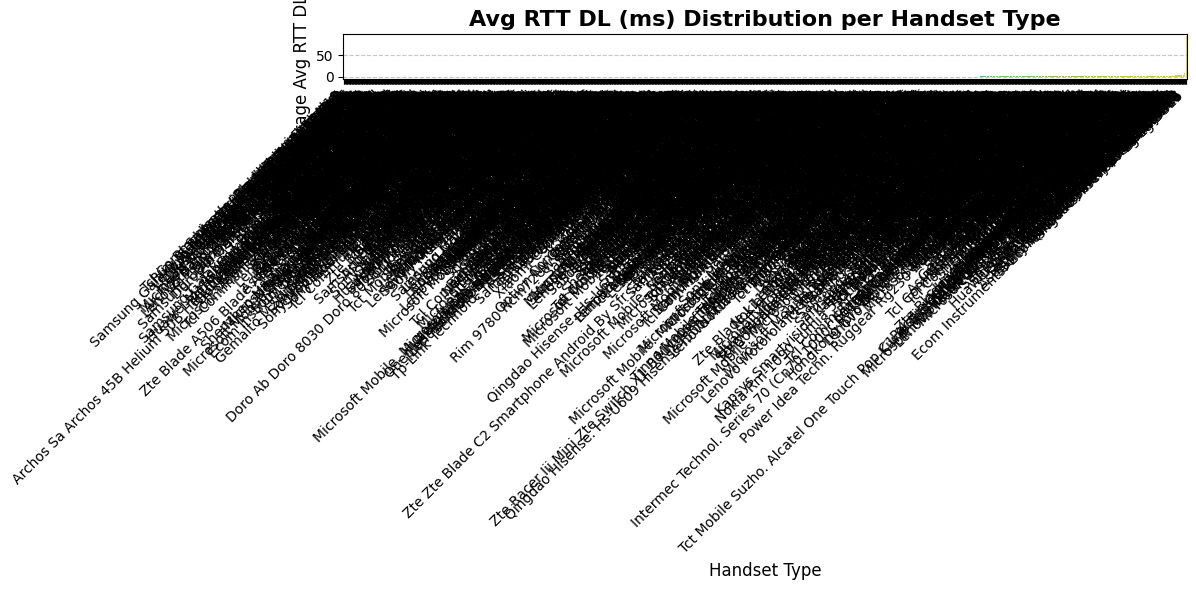

Handset Type
Huawei Bnd-Al10                                      -0.180730
Huawei Fig-La1                                       -0.172094
Tcl Communicatio. Blackberry Bba100-2                -0.172094
Telit Le910-Eug                                      -0.172094
Samsung Galaxy J7 (Sm-J701F)                         -0.170366
                                                       ...    
Huawei Bkl-Al20                                       4.566779
Ecom Instruments. Ecom Mobile Safety Ex-Handy 209     8.400542
Qingdao Hisense. Starxtrem 6                          8.652729
Sfr Starxtrem5                                       15.810699
Lg Lg-D315                                           94.534545
Name: Avg RTT DL (ms), Length: 1394, dtype: float64

In [12]:
# Step 8: Analyze distributions for Avg RTT DL (ms) per Handset Type
analyze_distributions(experience_metrics, 'Avg RTT DL (ms)', 'Handset Type')

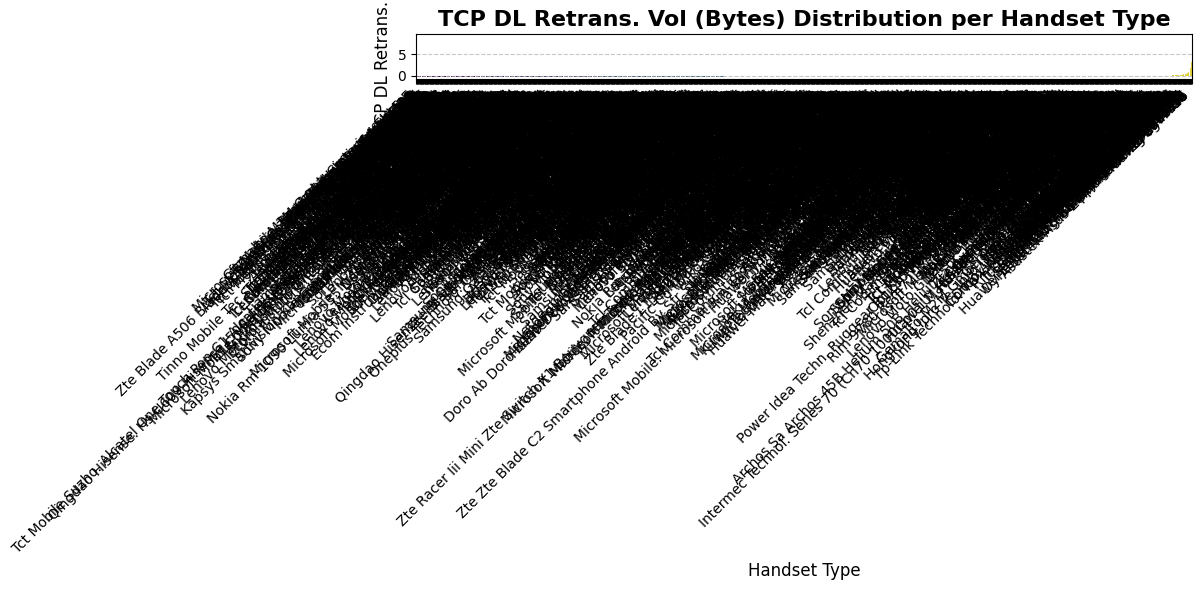

Handset Type
Gemalto M2M Gmbh Cinterion Ehs5-E            -0.205862
Microsoft Mobile. Rm-1062 Lumia 640 Xl Lte   -0.205861
Hmd Global Oy Nokia 6 Ds                     -0.205861
Archos Sa Sense 55S                          -0.205861
Tcl Communicatio. Nura 2                     -0.205861
                                                ...   
Apple iPad Pro (A1652)                        1.097972
Huawei E5776S-32                              1.853727
Asustek Asus Zenfone Selfie Zd551Kl           3.057323
Huawei Bln-Al10                               3.160770
Lg Lg-H635                                    9.122633
Name: TCP DL Retrans. Vol (Bytes), Length: 1394, dtype: float64

In [13]:
# Step 9: Analyze distributions for TCP DL Retrans. Vol (Bytes) per Handset Type
analyze_distributions(experience_metrics, 'TCP DL Retrans. Vol (Bytes)', 'Handset Type')

In [14]:
# Step 10: analyze top, bottom, and most frequent values for Avg RTT DL (ms)
top, bottom, frequent = analyze_top_bottom_frequent(experience_metrics, 'Avg RTT DL (ms)')

In [15]:
# Print the top values
print("Top values for Avg RTT DL (ms):\n", top)

Top values for Avg RTT DL (ms):
         MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
47983    3.366232e+10                     0.007208   
80249    3.368369e+10                    -0.205861   
41944    3.366087e+10                     0.007208   
93844    3.376094e+10                    -0.200511   
1713     3.360679e+10                    -0.205726   
74240    3.367182e+10                     0.007208   
104325   3.378187e+10                    -0.203843   
105752   3.378401e+10                     0.007208   
85683    3.369855e+10                    -0.099299   
15409    3.362963e+10                    -0.202124   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
47983                 764055.136253       167.212808              1.0   
80249                 764055.136253        94.534545              1.0   
41944                 764055.136253        55.645904              2.0   
93844                  17613.000000        46.384072            307.0   
1713   

In [16]:
# Print the bottom values
print("Bottom values for Avg RTT DL (ms):\n", bottom)

Bottom values for Avg RTT DL (ms):
         MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
28878    3.365298e+10                     0.007208   
40873    3.366064e+10                     0.007208   
44748    3.366158e+10                     0.007208   
66098    3.366748e+10                     0.007208   
88903    3.369954e+10                     0.007208   
98541    3.376275e+10                     0.007208   
39066    3.366020e+10                     0.007208   
83396    3.369505e+10                     0.007208   
36039    3.365949e+10                     0.007208   
106569   3.378806e+10                     0.007208   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
28878                 764055.136253        -0.203185              0.0   
40873                 764055.136253        -0.203185             29.0   
44748                 764055.136253        -0.203185              0.0   
66098                 764055.136253        -0.203185            785.0   
8890

In [17]:
# Print the frequent values
print("Most frequent values for Avg RTT DL (ms):\n", frequent)

Most frequent values for Avg RTT DL (ms):
 Avg RTT DL (ms)
-0.016445    18536
-0.154820     2282
-0.156548     2013
-0.144457     1832
-0.142729     1652
-0.139275     1640
-0.137547     1618
-0.153093     1546
-0.141002     1541
-0.158275     1495
Name: count, dtype: int64


In [18]:
# Step 11: analyze top, bottom, and most frequent values for Avg Bearer TP DL (kbps)
top, bottom, frequent = analyze_top_bottom_frequent(experience_metrics, 'Avg Bearer TP DL (kbps)')

In [19]:
# Print the top values
print("Top values for Avg Bearer TP DL (kbps):\n", top)

Top values for Avg Bearer TP DL (kbps):
         MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
49595    3.366268e+10                    -0.205764   
37838    3.365991e+10                    -0.093709   
14564    3.362795e+10                    -0.204248   
60763    3.366566e+10                    -0.149257   
27722    3.365148e+10                    -0.121988   
92374    3.376033e+10                     0.178233   
98280    3.376267e+10                    -0.188521   
104697   3.378240e+10                    -0.088746   
52298    3.366336e+10                    -0.197944   
52830    3.366349e+10                     0.327478   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
49595                  7.640551e+05        -0.165184             15.0   
37838                  7.272550e+05        -0.149639              4.0   
14564                  3.393000e+04        -0.116820              5.0   
60763                  9.138350e+04        -0.080546             23.0   

In [20]:
# Print the bottom values
print("Bottom values for Avg Bearer TP DL (kbps):\n", bottom)

Bottom values for Avg Bearer TP DL (kbps):
       MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
229    3.360145e+10                     0.007208                764055.136253   
857    3.360345e+10                     0.007208                764055.136253   
1094   3.360385e+10                     0.007208                 13043.000000   
1204   3.360413e+10                     0.007208                764055.136253   
1434   3.360551e+10                     0.007208                764055.136253   
1985   3.360748e+10                     0.007208                764055.136253   
1992   3.360749e+10                     0.007208                  3990.000000   
2473   3.360851e+10                     0.007208                764055.136253   
2605   3.360875e+10                     0.007208                764055.136253   
2671   3.360889e+10                     0.007208                764055.136253   

      Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps) 

In [21]:
# Print the frequent values
print("Most frequent values for Avg Bearer TP DL (kbps):\n", frequent)

Most frequent values for Avg Bearer TP DL (kbps):
 Avg Bearer TP DL (kbps)
-0.563493    4108
-0.564318    3062
-0.562522    2486
-0.562473    2087
-0.563541    1824
-0.561551    1637
-0.562279    1600
-0.562571    1575
-0.562328    1331
-0.562425    1144
Name: count, dtype: int64


In [22]:
# Step 12: analyze top, bottom, and most frequent values for TCP DL Retrans. Vol (Bytes)
top, bottom, frequent = analyze_top_bottom_frequent(experience_metrics, 'TCP DL Retrans. Vol (Bytes)')

In [23]:
# Print the top values
print("Top values for TCP DL Retrans. Vol (Bytes):\n", top)

Top values for TCP DL Retrans. Vol (Bytes):
        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
85785   3.369858e+10                    43.679520   
32273   3.365871e+10                    43.664918   
58026   3.366491e+10                    43.464101   
31942   3.365863e+10                    43.323036   
62049   3.366613e+10                    42.878453   
70079   3.366877e+10                    42.422175   
43629   3.366131e+10                    42.058515   
48341   3.366240e+10                    41.922522   
64113   3.366682e+10                    40.391148   
98211   3.376264e+10                    38.521166   

       TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
85785                   11989838.0         0.218278            242.0   
32273                      60496.0        -0.096092             19.0   
58026                     215354.0         0.323644            148.0   
31942                      15816.0        -0.097819             27.0   
62049      

In [24]:
# Print the bottom values
print("Bottom values for TCP DL Retrans. Vol (Bytes):\n", bottom)

Bottom values for TCP DL Retrans. Vol (Bytes):
         MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
56622    3.366454e+10                    -0.205862   
95322    3.376154e+10                    -0.205862   
71705    3.366931e+10                    -0.205862   
71778    3.366933e+10                    -0.205862   
87156    3.369900e+10                    -0.205862   
87348    3.369906e+10                    -0.205862   
95213    3.376151e+10                    -0.205862   
95331    3.376154e+10                    -0.205862   
95774    3.376162e+10                    -0.205862   
100616   3.376394e+10                    -0.205862   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
56622                  21557.000000         0.551649              4.0   
95322                 764055.136253        -0.154820              4.0   
71705                 764055.136253        -0.147911             11.0   
71778                   5296.000000        -0.142729             

In [25]:
# Print the frequent values
print("Most frequent values for TCP DL Retrans. Vol (Bytes):\n", frequent)

Most frequent values for TCP DL Retrans. Vol (Bytes):
 TCP DL Retrans. Vol (Bytes)
 0.007208    58323
-0.205848      247
-0.205834      138
-0.205861      112
-0.099320      103
-0.205861       99
-0.205848       79
-0.205821       72
-0.099326       68
-0.205807       64
Name: count, dtype: int64
